# **Import librares**

In [1]:

import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
# from nltk.corpus import reuters
# from nltk.corpus import brown
# from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import pickle
import joblib
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
# from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
# from keras.models import Sequential, load_model
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from keras_preprocessing.sequence import pad_sequences
# from keras.utils.np_utils import to_categorical
# from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
# from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
# import urllib
# import requests
import re
# !pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

C:\Users\vans9\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vans9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vans9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vans9\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\vans9\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\vans9\AppData\Roaming\nltk_data...


True

### **Load Dataset**

In [2]:
df=pd.read_csv("C:\\Users\\vans9\\Downloads\\Multiclass-Text-Classification-main (1)\\Multiclass-Text-Classification-main\\Notebook\\data\\bbc-text.csv",engine='python', encoding='UTF-8')
df['category'].value_counts()
# "/content/bbc-text.csv"

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [3]:
df.to_csv("bbc-text.csv", index=False)

In [4]:
df['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

# **Data Cleaning**

In [5]:
df['text']=df['text'].fillna("") 
df.isna().sum()

category    0
text        0
dtype: int64

# **Preprocessing**

In [6]:
df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)  

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ') 
 
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [7]:
df

,category,text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","['tv', 'future', 'hands', 'viewers', 'home', '...","[tv, future, hands, viewers, home, theatre, sy...",tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","['worldcom', 'boss', 'left', 'books', 'alone',...","[worldcom, boss, left, books, alone, former, w...",worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","['tigers', 'wary', 'farrell', 'gamble', 'leice...","[tigers, wary, farrell, gamble, leicester, say...",tigers wary farrell gamble leicester say will ...,tiger wary farrell gamble leicester say will n...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","['yeading', 'face', 'newcastle', 'fa', 'cup', ...","[yeading, face, newcastle, fa, cup, premiershi...",yeading face newcastle fa cup premiership side...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","['ocean', 'twelve', 'raids', 'box', 'office', ...","[ocean, twelve, raids, box, office, ocean, twe...",ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...
...,...,...,...,...,...,...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,"[cars, pull, down, us, retail, figures, us, re...","['cars', 'pull', 'us', 'retail', 'figures', 'u...","[cars, pull, us, retail, figures, us, retail, ...",cars pull us retail figures us retail sales fe...,car pull u retail figure u retail sale fell ja...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...,kilroy unveils immigration policy ex chatshow ...,"[kilroy, unveils, immigration, policy, ex, cha...","['kilroy', 'unveils', 'immigration', 'policy',...","[kilroy, unveils, immigration, policy, ex, cha...",kilroy unveils immigration policy ex chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,"[rem, announce, new, glasgow, concert, us, ban...","['rem', 'announce', 'new', 'glasgow', 'concert...","[rem, announce, new, glasgow, concert, us, ban...",rem announce new glasgow concert us band rem a...,rem announce new glasgow concert u band rem an...
2223,politics,how political squabbles snowball it s become c...,how political squabbles snowball it s become c...,how political sq

## Visualization

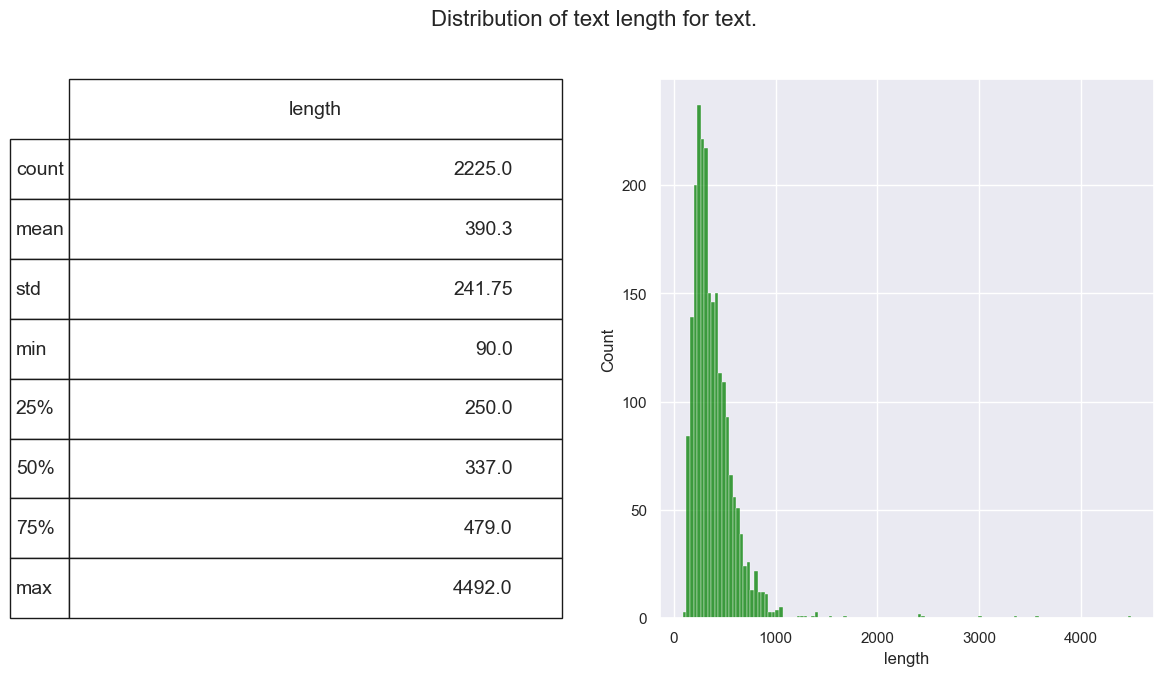

In [8]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

<Axes: xlabel='category', ylabel='count'>

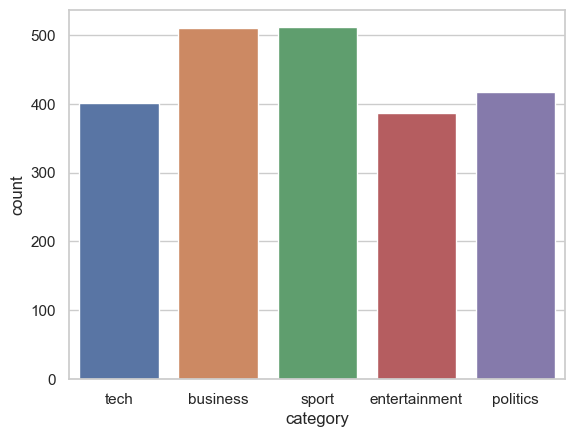

In [9]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [11]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [12]:
sport_text = df[df['category']=='sport']
business_text = df[df['category']=='business'] 
politics_text = df[df['category']=='politics']
tech_text = df[df['category']=='tech'] 
entertainment_text = df[df['category']=='entertainment'] 

In [13]:
top = Counter([item for sublist in sport_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in sport_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [14]:
top = Counter([item for sublist in business_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in business_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [15]:
top = Counter([item for sublist in politics_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in politics_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [16]:
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in tech_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [17]:
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in entertainment_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

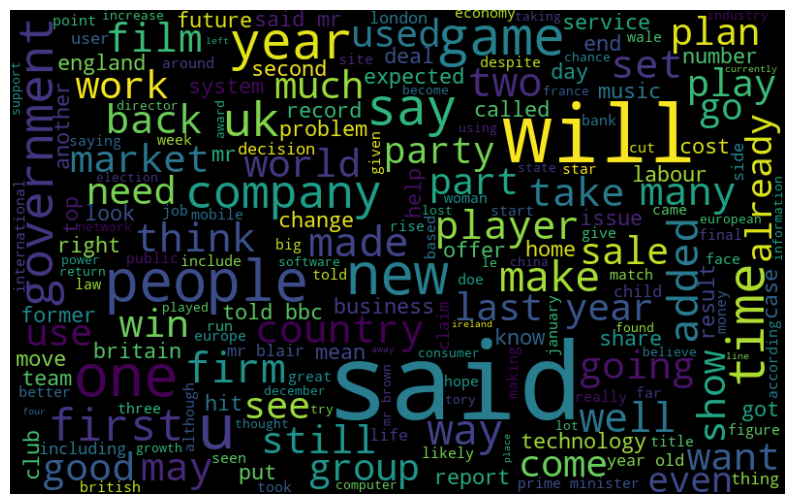

In [18]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

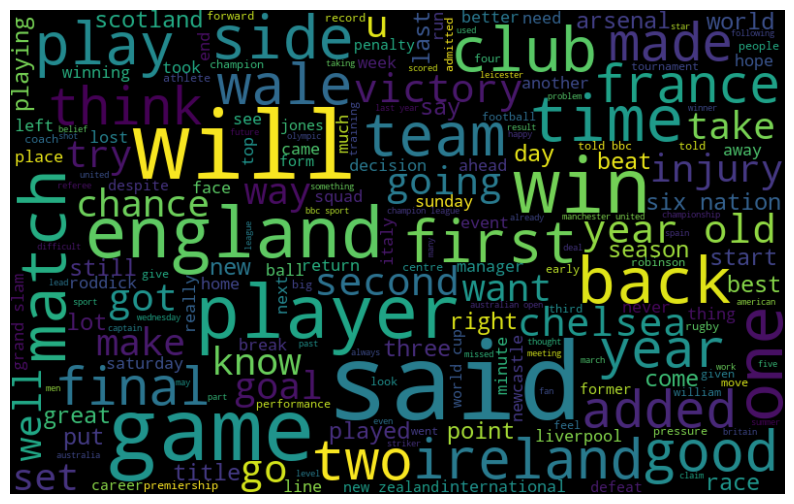

In [19]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'sport']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

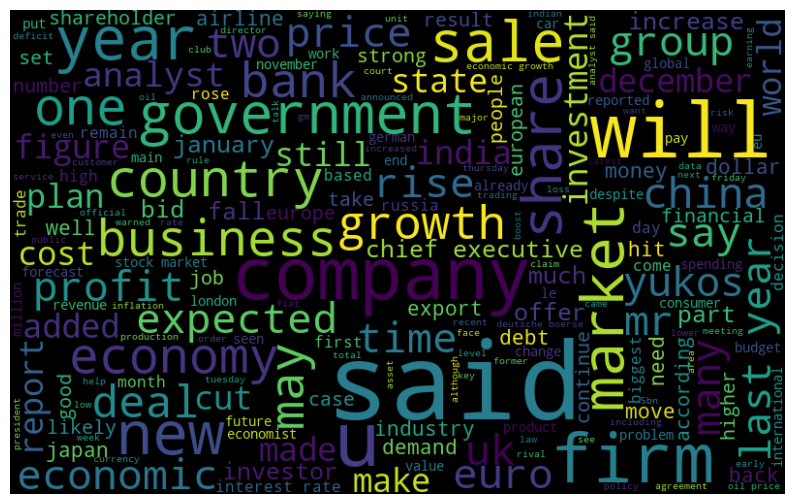

In [20]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

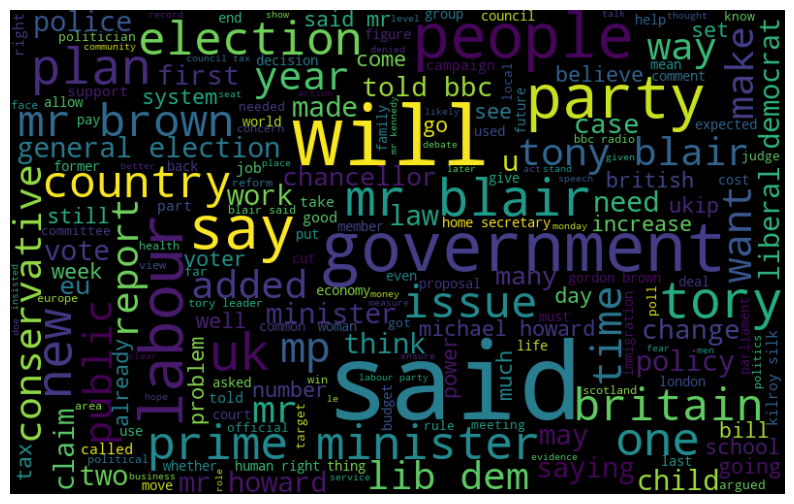

In [21]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'politics']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

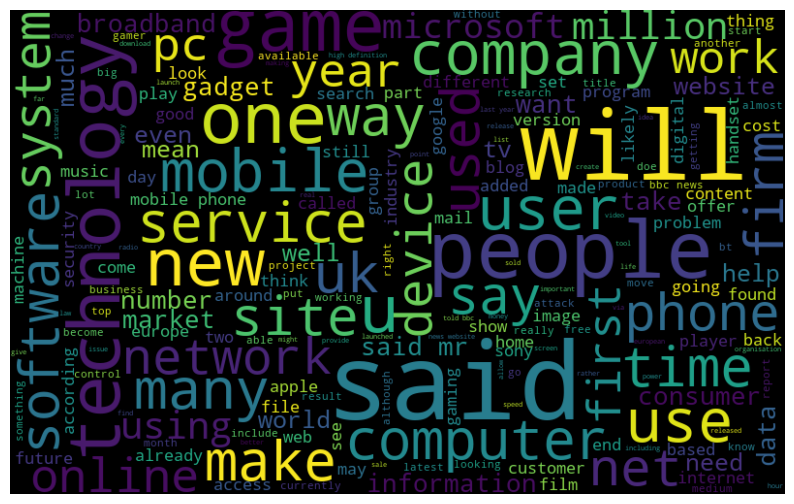

In [22]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'tech']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

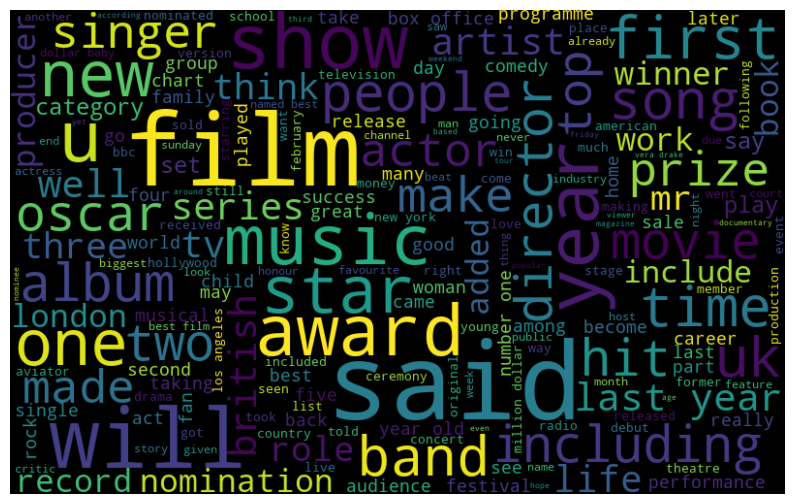

In [23]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'entertainment']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(1668, 284054) (557, 284054) (1668,) (557,)


In [25]:
joblib.dump(transformer,'transformer.pkl')

['transformer.pkl']

In [42]:
joblib.dump(count_vect, 'count_vect.pkl')
#model = joblib.load('count_vect.pkl')

['count_vect.pkl']

# **Machine Learning Models**

# **Logistic Regression**

In [26]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.9658886894075404
               precision    recall  f1-score   support

     business       0.94      0.96      0.95       136
entertainment       1.00      0.94      0.97        96
     politics       0.94      0.98      0.96        98
        sport       0.98      0.99      0.98       124
         tech       0.98      0.95      0.97       103

     accuracy                           0.97       557
    macro avg       0.97      0.96      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [27]:
mc = count_vect.transform(["howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an attack mongrel shows labour is rattled by the opposition. in an upbeat speech to his party s spring conference in brighton he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate. something tells me that someone somewhere out there is just a little bit rattled mr howard said. mr hain leader of the commons told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an attack mongrel and playing opposition for opposition sake . mr howard told his party that labour would do anything say anything claim anything to cling on to office at all costs . so far this year they have compared me to fagin to shylock and to a flying pig. this morning peter hain even called me a mongrel. i don t know about you but something tells me that someone somewhere out there is just a little bit rattled. environment secretary margaret beckett rejected mr howard s comment telling radio 4 s pm programme that labour was not rattled . we have a very real duty to try to get people to focus on michael howard s record what the proposals are that he is trying to put forward to the country and also the many examples we are seeing now of what we believe is really poor judgement on his behalf. mr howard said tory policies on schools taxes immigration and crime were striking a chord with voters. since the beginning of this year - election year - we ve been making the political weather he told the party conference. mr howard denied he had been playing politics by raising the case of margaret dixon whose operation had been cancelled seven times which grabbed headlines for the party two weeks ago. and he hit back at labour claims he had used mrs dixon as a human shield . she s not a human shield mr blair she s a human being. mr howard said his party plans for immigration quotas which have also been the focus of much media coverage were not racist - just common sense . he pledged cleaner hospitals and better school discipline with a promise to get rid of political correctness in the national curriculum and give everyone to the same chance of a decent state education as he had. i come from an ordinary family. if the teenage michael howard were applying to cambridge today gordon brown would love me. and he stressed his party s commitment to cut taxes and red tape and increase the basic state pension in line with earnings. he finished with a personal appeal to party activists to go out and win the next election. one day you will be able to tell your children and grandchildren as i will tell mine i was there. i did my bit. i played my part. i helped to win that famous election - the election that transformed our country for the better . labour election co-ordinator alan milburn said: michael howard s speech today confirms what we have always said - that his only strategy is opportunism but he has no forward vision for the country. in reference to the appearance of mr howard s family on the conference stage with him mr milburn said: michael howard is perfectly entitled to pose with his family today. but it is the hard working families across britain that will be damaged by his plan to cut £35bn from public spending."])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['politics']


In [28]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)  
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.9658886894075404
Cross-validated scores: [0.98203593 0.96407186 0.98203593 0.98802395 0.95209581 0.98203593
 0.9760479  0.96407186 0.96987952 0.97590361]


In [47]:
joblib.dump(lr, 'Text_LR.pkl')
#model = joblib.load('Text_LR.pkl')

['Text_LR.pkl']

# **Support Vector Machine**

In [30]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.9694793536804309
               precision    recall  f1-score   support

     business       0.97      0.94      0.96       136
entertainment       1.00      0.95      0.97        96
     politics       0.93      0.99      0.96        98
        sport       0.98      0.99      0.98       124
         tech       0.97      0.98      0.98       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [31]:
mc = count_vect.transform(["To combat this trend, we need politicians who are willing to stand up for the interests of the working class. We need leaders who are committed to creating a more just and equitable society, where everyone has a chance to succeed regardless of their background."])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['politics']


In [32]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.9694793536804309
Cross-validated scores: [0.98203593 0.96407186 0.98802395 0.99401198 0.97005988 0.99401198
 0.98203593 0.97005988 0.98795181 0.98795181]


In [51]:
joblib.dump(svc, 'Text_SVM.pkl')
#model = joblib.load('Text_SVM.pkl')

['Text_SVM.pkl']



## **Naive Bayes(Multinomial)**

In [33]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.9497307001795332
               precision    recall  f1-score   support

     business       0.92      0.96      0.94       136
entertainment       1.00      0.84      0.92        96
     politics       0.91      0.99      0.95        98
        sport       0.96      1.00      0.98       124
         tech       0.98      0.94      0.96       103

     accuracy                           0.95       557
    macro avg       0.95      0.95      0.95       557
 weighted avg       0.95      0.95      0.95       557



In [34]:
mc = count_vect.transform(["One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['politics']


In [35]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.9497307001795332
Cross-validated scores: [0.96407186 0.95209581 0.97005988 0.94610778 0.91017964 0.94610778
 0.94610778 0.94011976 0.94578313 0.96385542]


## **Randomforest**


In [36]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.9515260323159784
               precision    recall  f1-score   support

     business       0.90      0.96      0.93       136
entertainment       1.00      0.92      0.96        96
     politics       0.95      0.94      0.94        98
        sport       0.95      0.99      0.97       124
         tech       1.00      0.94      0.97       103

     accuracy                           0.95       557
    macro avg       0.96      0.95      0.95       557
 weighted avg       0.95      0.95      0.95       557



In [42]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['entertainment']


In [43]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

KeyboardInterrupt: 

# **Comparison Between ML Models**

In [40]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                        #    'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           

})

In [41]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes
Accuracy,96.588869,96.947935,94.973070
F1_score,96.599729,96.974547,94.817141
Recall,96.588869,96.947935,94.973070
Precision,96.588869,96.947935,94.973070
